# 分类模型评价方法
* 准确率
* 查准率
* 召回率
* F1值
* ROC曲线

In [1]:
import pandas as pd

df = pd.read_csv("credit_risk_train.csv")  # 读取数据文件
df.head()

,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,AGE,SEX,EDUCATION,MARRIAGE,RISK
0,0,0,0,0,0,0,37,Female,Graduate School,Married,LOW
1,8525,5141,5239,7911,17890,10000,25,Male,High School,Single,HIGH
2,628,662,596,630,664,598,39,Male,Graduate School,Married,HIGH
3,4649,3964,3281,934,467,12871,41,Female,Graduate School,Single,HIGH
4,46300,10849,8857,9658,9359,9554,55,Female,High School,Married,HIGH


In [2]:
# 处理数据
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

df.RISK = df.RISK.replace({"LOW": 0, "HIGH": 1})  # 将分类标签替换为数值，方便后面计算

train_data = df.iloc[:, :-1]  # 特征数据列
train_data = pd.get_dummies(train_data)  # 对特征数据进行独热编码，只处理非数值列
train_data = scale(train_data)  # 规范化处理

train_target = df["RISK"]  # 目标数据列

# 划分数据集，训练集占 70%，测试集占 30%
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_target, test_size=0.3, random_state=0
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

/tmp/ipykernel_341106/2451431823.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.RISK = df.RISK.replace({"LOW": 0, "HIGH": 1})  # 将分类标签替换为数值，方便后面计算


((14000, 16), (6000, 16), (14000,), (6000,))

In [3]:
# 训练模型
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs")  # 定义逻辑回归模型
model.fit(X_train, y_train)  # 使用训练数据完成模型训练

LogisticRegression()

### 准确率Accurary
* 实际HIGH，预测HIGH: True Positive(TP)，预测正确
* 实际HIGH，预测LOW: False Negative(FN)，预测遗漏
* 实际LOW，预测HIGH: False Positive(FP)，预测错误
* 实际LOW，预测LOW: True Negative(TN)，预测正确
$$Accurary=\frac{TP+TN}{TP+TN+FP+FN}$$

In [4]:
y_pred = model.predict(X_test)  # 输入测试集特征数据得到预测结果

import numpy as np

def get_accuracy(test_labels, pred_lables):
    # 准确率计算公式，根据公式 2 实现
    correct = np.sum(test_labels == pred_lables)  # 计算预测正确的数据个数
    n = len(test_labels)  # 总测试集数据个数
    acc = correct / n
    return acc

get_accuracy(y_test, y_pred)  # 计算模型预测准确率

np.float64(0.7678333333333334)

In [5]:
# 直接使用准确率的scikit-learn计算方法
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)  # 传入真实类别和预测类别

0.7678333333333334

### 查准率
也叫精确率，即正确分类的正例个数占分类为正例的实例个数的比例
$$
Precision=\frac{TP}{TP+FP}
$$

In [6]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

np.float64(0.7678333333333334)

### 召回率
也叫查全率，即正确分类的正例个数占实际正例个数的比例
$$
Recall=\frac{TP}{TP+FN}
$$

In [7]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

np.float64(1.0)

### F1值
F1值是查准率和召回率的加权平均
$$
F1=\frac{2*(Precision*Recall)}{Precision+Recall}
$$

In [8]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

np.float64(0.8686716319411709)

### ROC曲线
部分分类模型中（如：逻辑回归），通常会设定一个阈值，并规定大于该阈值为正类，小于则为负类。所以，当我们减小阀值时，将会有更多的样本被划分到正类。这样会提高正类的识别率，但同时也会使得更多的负类被错误识别为正类

所以，ROC 曲线的目的在用形象化该变化过程，从而评价一个分类器好坏

ROC曲线中有两个指标，分别是TPR和FPR：
$$TPR=\frac{TP}{TP+FN}$$
$$FPR=\frac{FP}{FP+TN}$$
ROC曲线中将横轴定为FPR，纵轴定为TPR，一个优秀分类器对应的ROC曲线应该尽量靠近左上角

虽然使用 ROC 曲线来表示分类器好坏很直观，但人们往往更喜欢使用数值来评价分类器，此时就提出了 AUC 的概念。AUC 的全称为 Area Under Curve，意思是曲线下面积，即 ROC 曲线下面积
* AUC=1：完美分类器
* 0.5 < AUC < 1：优于随机猜测
* AUC=0.5：和随机猜测结果接近
* AUC < 0.5：不如随机猜测

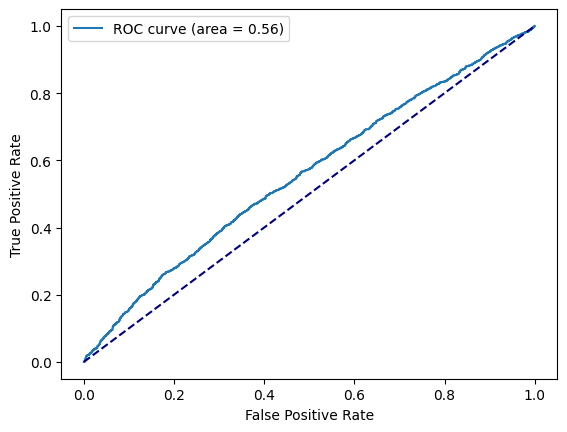

In [9]:
from matplotlib import pyplot as plt

%matplotlib inline

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_score = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()